In [1]:
print("Hello, Jupyter!")

Hello, Jupyter!


In [3]:
print("안녕하세요! 주피터 노트북 시작입니다 🧡")

안녕하세요! 주피터 노트북 시작입니다 🧡


In [5]:
!pip install yfinance numpy pandas matplotlib scikit-learn tensorflow --quiet

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Matplotlib is building the font cache; this may take a moment.


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Epoch 1/5



C:\Users\rpabot06\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1702
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0053
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0035
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0026
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0027
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


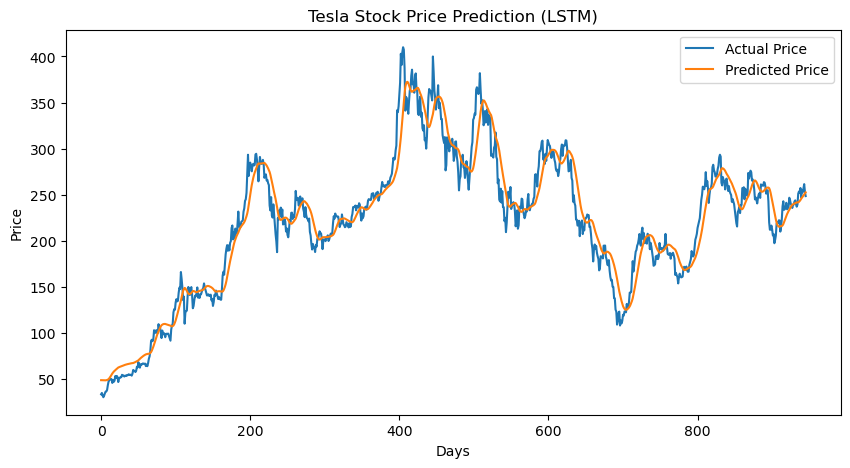

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. 데이터 불러오기 (테슬라 주가)
df = yf.download("TSLA", start="2020-01-01", end="2024-01-01")
data = df[['Close']]

# 2. 데이터 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 3. 시퀀스 생성 (과거 60일 -> 다음 날 예측)
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# 4. LSTM 입력 형태로 변환
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# 5. LSTM 모델 구성
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 6. 모델 학습
model.fit(X, y, epochs=5, batch_size=32)

# 7. 예측 & 시각화
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

# 시각화
plt.figure(figsize=(10,5))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.legend()
plt.title("Tesla Stock Price Prediction (LSTM)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.model_selection import train_test_split

# 예제 데이터 생성 (임의의 시계열 데이터)
data = np.sin(np.linspace(0, 100, 1000))  # 1000개의 데이터 포인트
data = data.reshape((len(data), 1, 1))  # (샘플 수, 타임스텝 수, 특성 수)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# GRU 모델 정의
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(1, 1)))  # 50개의 유닛
model.add(Dense(1))  # 출력층

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
model.fit(train_data, train_data, epochs=10, batch_size=32)

# 예측
predictions = model.predict(test_data)


Epoch 1/10


C:\Users\rpabot06\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5018
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3657
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2482 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1562
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0922
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0395 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0156
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055  
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0026
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [13]:
!pip install tensorflow scikit-learn

In [15]:
# 필요한 라이브러리 임포트
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.model_selection import train_test_split

# 예제 데이터 생성 (임의의 시계열 데이터)
data = np.sin(np.linspace(0, 100, 1000))  # 1000개의 데이터 포인트
data = data.reshape((len(data), 1, 1))  # (샘플 수, 타임스텝 수, 특성 수)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# GRU 모델 정의
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(1, 1)))  # 50개의 유닛
model.add(Dense(1))  # 출력층

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
model.fit(train_data, train_data, epochs=10, batch_size=32)

# 예측
predictions = model.predict(test_data)

# 예측 결과 출력
print(predictions[:5])  # 예측한 결과의 첫 5개 값 출력


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4609
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3040  
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1842
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0913  
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0322 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0066  
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010  
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.8369e-04
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6131e-04 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[-0.97895116]
 [-0.97742707]
 [-0.96810955]
 [-0.9511027 ]
 [-0.92659545]]


In [17]:
!pip install prophet --quiet

In [19]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# 1. 예시 데이터 생성
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df.columns = ['ds', 'y']  # Prophet은 날짜: ds, 값: y 로 정해져 있음
df['ds'] = pd.to_datetime(df['ds'])

# 2. 모델 생성 및 학습
model = Prophet()
model.fit(df)

# 3. 미래 12개월 예측
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# 4. 시각화
model.plot(forecast)
plt.title("예측 결과 (항공 승객 수)")
plt.show()


AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [21]:
!pip uninstall prophet -y
!pip install fbprophet --quiet


Found existing installation: prophet 1.1.6
Uninstalling prophet-1.1.6:
  Successfully uninstalled prophet-1.1.6


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\rpabot06\AppData\Local\Temp\pip-install-zf_7dxvz\pystan_6b3d818cd55e413ba01829e31e8eed7a\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [22]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# 1. 예시 데이터 생성
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df.columns = ['ds', 'y']  # Prophet은 날짜: ds, 값: y 로 정해져 있음
df['ds'] = pd.to_datetime(df['ds'])

# 2. 모델 생성 및 학습
model = Prophet()
model.fit(df)

# 3. 미래 12개월 예측
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# 4. 시각화
model.plot(forecast)
plt.title("예측 결과 (항공 승객 수)")
plt.show()


ModuleNotFoundError: No module named 'fbprophet'